In [0]:
import model_autoenocer
from model_autoenocer import Net
import feature_aoutoencoder
from feature_aoutoencoder import feature_builder
import lsh_autoencoder
from lsh_autoencoder import lshasher
import similar_images
from similar_images import similar_item
import inferencedata_ae
from inferencedata_ae import get_file

from io import BytesIO
import pickle
!pip install lshashpy3
from lshashpy3 import LSHash
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
import requests
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import click

import click

In [36]:
def main(**kwargs):
    
    """ Main module for inference on an i/p image """
    #Getting File class
    mean=[0.485,0.456,0.406]
    std=[0.5,0.5,0.5]
    composed=transforms.Compose([transforms.Resize(256),transforms.ToTensor(),transforms.Normalize(mean,std)])
    file_obj=get_file(512,transform=composed)
    
    #Loading Latent similiarity Hashing
    lsh = pickle.load(open(kwargs['lsh_feat'], "rb"))
    
    #Loading the model class and saved model weights
    model = Net(True)
    device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    ckpt=torch.load(kwargs['model_wt'],map_location=device)
    model.load_state_dict(ckpt['model_state_dict'])
    val='Y'
    while(True):
        #Getting fiile
        img_data= file_obj.__getitem__(kwargs['file'])

        #Evaluating our image tensor to extract features from the model
        print("Retrieving features")
        feature_rep=feature_builder(model)
        dict_feat,features=feature_rep.get_feature(img_data,1,False)

        #Getting similar items
        similarity_obj=similar_item(dict_feat,lsh)
        similarity_obj.__getitem__(kwargs['n'])
        print("To retrives another image press Y")
        val=input("You wan to continue: ")
        if val is not 'Y':
            break
        print("Enter file path or url of the image")
        kwargs['file']=input("local path or url of the file : ")
    

Enter url or local directory path of image to retrieve similar image
url to download image or local directory path../input/similar-image/dataset/dataset/1006.jpg
Enter directory path for model weight
directory path for model weight../input/similar-image/Autoencoder.pt
Enter directory path of lsh pickle
directory path of lsh pickle../input/similar-image/lsh (3).p
Enter no. of items
no. of items5
Opening File
Retrieving features


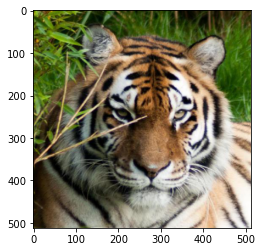

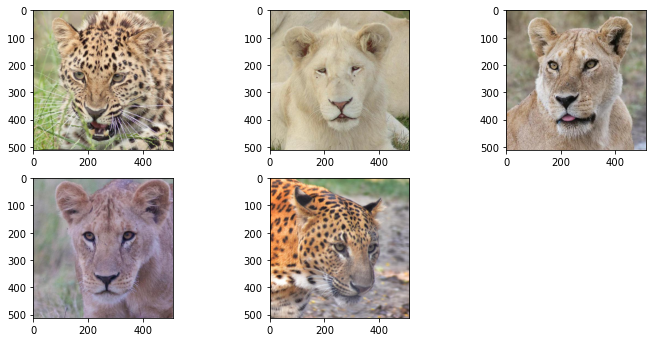

To retrives another image press Y
You wan to continue: Y
Enter file path or url of the image
local path or url of the file : ../input/similar-image/dataset/dataset/106.jpg
Opening File
Retrieving features


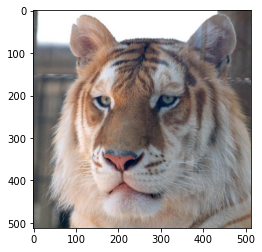

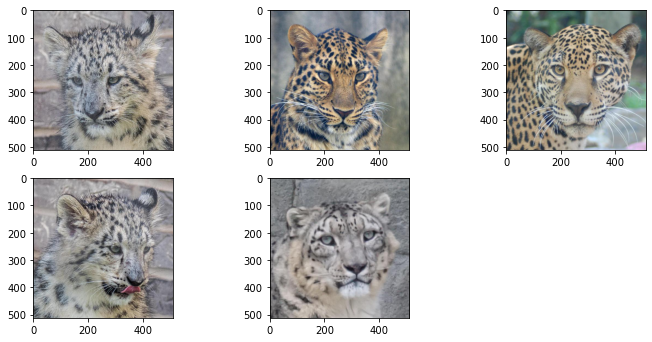

To retrives another image press Y
You wan to continue: y
Enter file path or url of the image
local path or url of the file : ../input/similar-image/dataset/dataset/206.jpg


In [37]:
if __name__=="__main__":
    
    ''' #Command line code and usage

        python Inference_autoencoder.py \
        --file "../input/similar-image/dataset/dataset/1006.jpg" \
        --model_wt "../input/similar-image/Autoencoder.pt" \
        --lsh_feat "../input/similar-image/lsh (3).p" \
        --n 5
        
        @click.command()

        @click.option(
            "--file",
            "-ip",

            required=True,
            help="Path for images"
        )


        @click.option(
            "--model_wt", "-wt", default="../input/similar-image/Autoencoder.pt", help="Path to the saved model"
        )

        @click.option(
            "--lsh_feat", "-lsh",  default="../input/similar-image/lsh (3).p", help="Path to saved pickle of lsh database"
        )

        click.option("--n","-n",type=click.IntRange(min=1, max=20), default=5,help="Number of similar images b/w 1 to 20") '''


     
    print("Enter url or local directory path of image to retrieve similar image")
    #file="../input/similar-image/dataset/dataset/1006.jpg"
    file=input("url to download image or local directory path")
    
    print("Enter directory path for model weight")
    model_wt=input("directory path for model weight")
    #p1="../input/similar-image/Autoencoder.pt"
    
    print("Enter directory path of lsh pickle")
    lsh_feat=input("directory path of lsh pickle")
    #p2="../input/similar-image/lsh (3).p"
    
    print("Enter no. of items")
    n=input("no. of items")
    #n=5
    
    lis={"file":file,"model_wt":model_wt,"lsh_feat":lsh_feat,"n":int(n)}
    main(**lis)